In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import ConcatDataset, Dataset, DataLoader
from PIL import Image
device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
class CustomImageFolderDataset(Dataset):
    def __init__(self, *paths):
        self.datasets = [datasets.ImageFolder(root=path) for path in paths]
        
        all_classes = sorted(set(cls for ds in self.datasets for cls in ds.classes))
        
        self.class_to_idx = {cls: idx for idx, cls in enumerate(all_classes)}
        self.classes = all_classes
        
        self.imgs = []
        for ds in self.datasets:
            for img_path, target in ds.imgs:
                new_target = self.class_to_idx[ds.classes[target]]
                self.imgs.append((img_path, new_target))
        
    def __getitem__(self, index):
        path, target = self.imgs[index]
        img = Image.open(path).convert('RGB')  
        return img, target

    def __len__(self):
        return len(self.imgs)

In [3]:
data_dir = '/kaggle/input/fruit-recognition/train/train'
dataset = CustomImageFolderDataset(data_dir)

In [4]:
dataset.classes

['Apple Braeburn',
 'Apple Granny Smith',
 'Apricot',
 'Avocado',
 'Banana',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe',
 'Cherry',
 'Clementine',
 'Corn',
 'Cucumber Ripe',
 'Grape Blue',
 'Kiwi',
 'Lemon',
 'Limes',
 'Mango',
 'Onion White',
 'Orange',
 'Papaya',
 'Passion Fruit',
 'Peach',
 'Pear',
 'Pepper Green',
 'Pepper Red',
 'Pineapple',
 'Plum',
 'Pomegranate',
 'Potato Red',
 'Raspberry',
 'Strawberry',
 'Tomato',
 'Watermelon']

In [5]:
len(dataset)

16854

In [6]:
from torch.utils.data import random_split

train_ratio = 0.8

# Розділіть набір даних
train_data, val_data = random_split(dataset, [train_ratio, 1-train_ratio])

In [7]:
train_transform = transforms.Compose([
    transforms.Resize((100, 100)), 
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=15), 
    transforms.ToTensor(), # Перетворити зображення у тензори PyTorch
])

test_transform = transforms.Compose([
    transforms.Resize((100, 100)), 
    transforms.ToTensor(), # Перетворити зображення у тензори PyTorch
])


class TransformDataset(torch.utils.data.Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform
        
    def __getitem__(self, index):
        x, y = self.subset[index]
        if self.transform:
            x = self.transform(x)
        return x, y
        
    def __len__(self):
        return len(self.subset)

    
train_data = TransformDataset(train_data, transform = train_transform)
val_data = TransformDataset(val_data, transform = test_transform)

In [8]:
len(train_data), len(val_data)

(13484, 3370)

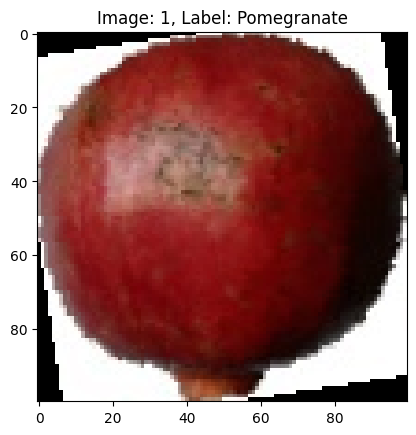

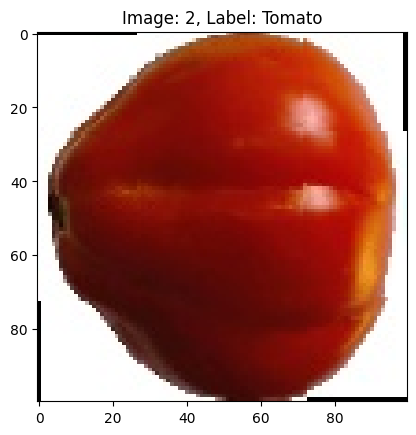

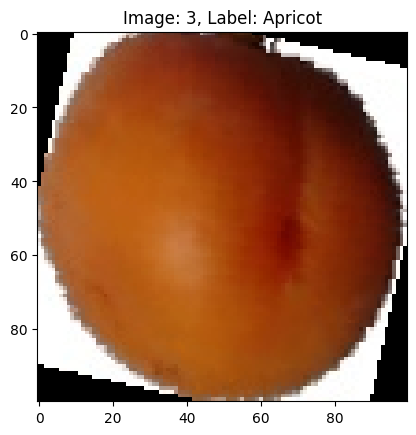

In [9]:
import matplotlib.pyplot as plt

for i in range(3):  # Show 3 images
    img, label = train_data[i]

    # Get the image data (tensor) and convert it back to a NumPy array for manipulation
    img = img.numpy()

    # Convert the color channels from (channels, height, width) to (height, width, channels) for pyplot
    img = img.transpose((1, 2, 0))

    # Get the label name from the dataset class labels
    label_name = dataset.classes[label]

    # Plot the image with a title (including label name)
    plt.imshow(img)
    plt.title(f"Image: {i+1}, Label: {label_name}")
    plt.show()